In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
two_moons_samples = pd.read_csv('../../results/two_moons_analysis_samples.csv')
two_moons_jitter = pd.read_csv('../../results/two_moons_analysis_jitter.csv')
blobs = pd.read_csv('../../results/den_blobs_analysis_dim.csv')

In [18]:
mean_std_1 = two_moons_results.groupby('n_samples')[['ROCK', 'DBSCAN', 'K_MEANS', 'SPECTRAL', 'MEAN_SHIFT']].agg([np.mean, np.std])
mean_std_2 = two_moons_jitter.groupby('jitter')[['ROCK', 'DBSCAN', 'K_MEANS', 'SPECTRAL', 'MEAN_SHIFT']].agg([np.mean, np.std])
mean_std_3 = blobs.groupby('features')[['ROCK', 'DBSCAN', 'K_MEANS', 'SPECTRAL', 'MEAN_SHIFT']].agg([np.mean, np.std])

In [24]:
def generate_figure(mean_std, xlabel):
    plt.plot(mean_std.index, mean_std['DBSCAN']['mean'], 'r.--', label='DBSCAN')
    plt.fill_between(mean_std.index, mean_std['DBSCAN']['mean'] - mean_std['DBSCAN']['std'], mean_std['DBSCAN']['mean'] + mean_std['DBSCAN']['std'], color='r', alpha=0.3)

    plt.plot(mean_std.index, mean_std['K_MEANS']['mean'], 'g^-', label='K_MEANS')
    plt.fill_between(mean_std.index, mean_std['K_MEANS']['mean'] - mean_std['K_MEANS']['std'], mean_std['K_MEANS']['mean'] + mean_std['K_MEANS']['std'], alpha=0.3)

    plt.plot(mean_std.index, mean_std['SPECTRAL']['mean'], 'd--', label='SPECTRAL')
    plt.fill_between(mean_std.index, mean_std['SPECTRAL']['mean'] - mean_std['SPECTRAL']['std'], mean_std['SPECTRAL']['mean'] + mean_std['SPECTRAL']['std'], alpha=0.3)

    plt.plot(mean_std.index, mean_std['MEAN_SHIFT']['mean'], 's--', label='MEAN_SHIFT')
    plt.fill_between(mean_std.index, mean_std['MEAN_SHIFT']['mean'] - mean_std['MEAN_SHIFT']['std'], mean_std['MEAN_SHIFT']['mean'] + mean_std['MEAN_SHIFT']['std'], alpha=0.3)

    plt.plot(mean_std.index, mean_std['ROCK']['mean'], 'b.-', label='ROCK')
    plt.fill_between(mean_std.index, mean_std['ROCK']['mean'] - mean_std['ROCK']['std'], mean_std['ROCK']['mean'] + mean_std['ROCK']['std'], color='b', alpha=0.3)


    plt.ylim(-0.1, 1.2)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel('Mean AMI')
    plt.tight_layout()
    plt.savefig('../../figures/two_moons_analysis_samples.png')

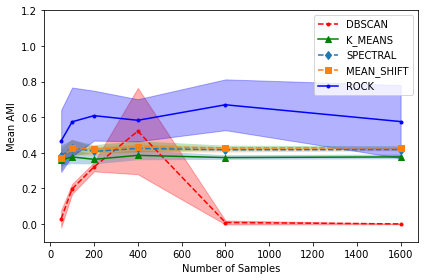

In [25]:
generate_figure(mean_std_1, 'Number of Samples')

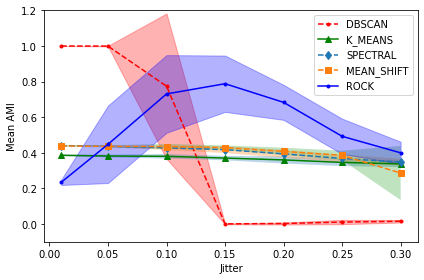

In [26]:
generate_figure(mean_std_2, 'Jitter')

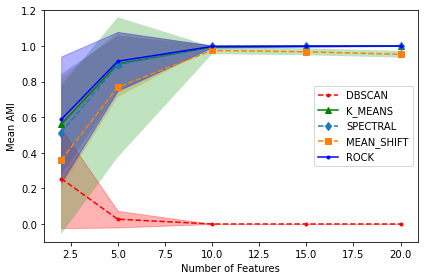

In [27]:
generate_figure(mean_std_3, 'Number of Features')